In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the correct file path for the medical data
medical_file_path = "medical_clean.csv"
# Read the medical data file with keep_default_na
df = pd.read_csv(medical_file_path, keep_default_na=False, index_col=0)

# Code to check for duplicates
has_duplicates = df.duplicated().any()
print("Duplicates present:", has_duplicates)

# Check for missing data
missing_data = df.isnull().sum()

# Display the missing data counts
print("Missing data counts:")
print(missing_data)

Duplicates present: False
Missing data counts:
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge      

In [3]:


# Display data types
df.info()
# Visually inspect df
pd.set_option("display.max_columns", None)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Summary statistics for the dependent variable
ReAdmis_summary = df["ReAdmis"].describe()
print("Summary Statistics for ReAdmis:")
print(ReAdmis_summary)


# Summary statistics for Initial_days
Initial_days_summary = df["Initial_days"].describe()
print("Summary Statistics for Initial_days:")
print(Initial_days_summary)


# Summary statistics for Age
Age_summary = df["Age"].describe()
print("Summary Statistics for Age:")
print(Age_summary)


Summary Statistics for ReAdmis:
count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object
Summary Statistics for Initial_days:
count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64
Summary Statistics for Age:
count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


In [5]:
# Summary statistics for Doc_visits 
Doc_visits_summary = df["Doc_visits"].describe()
print("Summary Statistics for Doc_visits:")
print(Doc_visits_summary)

# Summary statistics for vitD_supp
vitD_supp_summary = df["vitD_supp"].describe()
print("Summary Statistics for vitD_supp:")
print(vitD_supp_summary)

# Summary statistics for Allergic_rhinitis
Allergic_rhinitis_summary = df["Allergic_rhinitis"].describe()
print("Summary Statistics for Allergic_rhinitis:")
print(Allergic_rhinitis_summary)

Summary Statistics for Doc_visits:
count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64
Summary Statistics for vitD_supp:
count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64
Summary Statistics for Allergic_rhinitis:
count     10000
unique        2
top          No
freq       6059
Name: Allergic_rhinitis, dtype: object


In [6]:
# Summary statistics for Arthritis
Arthritis_summary = df["Arthritis"].describe()
print("Summary Statistics for Arthritis:")
print(Arthritis_summary)

# Summary statistics for Asthma
Asthma_summary = df["Asthma"].describe()
print("Summary Statistics for Asthma:")
print(Asthma_summary)

# Summary statistics for BackPain
BackPain_summary = df["BackPain"].describe()
print("Summary Statistics for BackPain:")
print(BackPain_summary)

Summary Statistics for Arthritis:
count     10000
unique        2
top          No
freq       6426
Name: Arthritis, dtype: object
Summary Statistics for Asthma:
count     10000
unique        2
top          No
freq       7107
Name: Asthma, dtype: object
Summary Statistics for BackPain:
count     10000
unique        2
top          No
freq       5886
Name: BackPain, dtype: object


In [7]:
# Summary statistics for Complication_risk
Complication_risk_summary = df["Complication_risk"].describe()
print("Summary Statistics for Complication_risk:")
print(Complication_risk_summary)

# Summary statistics for Diabetes
Diabetes_summary = df["Diabetes"].describe()
print("Summary Statistics for Diabetes:")
print(Diabetes_summary)

# Summary statistics for Gender
Gender_summary = df["Gender"].describe()
print("Summary Statistics for Gender:")
print(Gender_summary)

Summary Statistics for Complication_risk:
count      10000
unique         3
top       Medium
freq        4517
Name: Complication_risk, dtype: object
Summary Statistics for Diabetes:
count     10000
unique        2
top          No
freq       7262
Name: Diabetes, dtype: object
Summary Statistics for Gender:
count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object


In [8]:
# Summary statistics for HighBlood
HighBlood_summary = df["HighBlood"].describe()
print("Summary Statistics for HighBlood:")
print(HighBlood_summary)

# Summary statistics for Hyperlipidemia
Hyperlipidemia_summary = df["Hyperlipidemia"].describe()
print("Summary Statistics for Hyperlipidemia:")
print(Hyperlipidemia_summary)

# Summary statistics for Initial_admin
Initial_admin_summary = df["Initial_admin"].describe()
print("Summary Statistics for Initial_admin:")
print(Initial_admin_summary)

Summary Statistics for HighBlood:
count     10000
unique        2
top          No
freq       5910
Name: HighBlood, dtype: object
Summary Statistics for Hyperlipidemia:
count     10000
unique        2
top          No
freq       6628
Name: Hyperlipidemia, dtype: object
Summary Statistics for Initial_admin:
count                   10000
unique                      3
top       Emergency Admission
freq                     5060
Name: Initial_admin, dtype: object


In [9]:
# Summary statistics for Overweight
Overweight_summary = df["Overweight"].describe()
print("Summary Statistics for Overweight:")
print(Overweight_summary)

# Summary statistics for Reflux_esophagitis
Reflux_esophagitis_summary = df["Reflux_esophagitis"].describe()
print("Summary Statistics for Reflux_esophagitis:")
print(Reflux_esophagitis_summary)

# Summary statistics for Services
Services_summary = df["Services"].describe()
print("Summary Statistics for Services:")
print(Services_summary)

# Summary statistics for Stroke
Stroke_summary = df["Stroke"].describe()
print("Summary Statistics for Stroke:")
print(Stroke_summary)

Summary Statistics for Overweight:
count     10000
unique        2
top         Yes
freq       7094
Name: Overweight, dtype: object
Summary Statistics for Reflux_esophagitis:
count     10000
unique        2
top          No
freq       5865
Name: Reflux_esophagitis, dtype: object
Summary Statistics for Services:
count          10000
unique             4
top       Blood Work
freq            5265
Name: Services, dtype: object
Summary Statistics for Stroke:
count     10000
unique        2
top          No
freq       8007
Name: Stroke, dtype: object


In [10]:

# Update 'Initial_days' and 'vitD_supp' to int
df["Initial_days"] = df["Initial_days"].astype(int)
df["vitD_supp"] = df["vitD_supp"].astype(int)

# Update 'Gender' to category
df["Gender"] = df["Gender"].astype("category")

# Update columns to boolean using mapping
bool_mapping = {"Yes": 1, "No": 0}
columns_to_convert = ["HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma", "ReAdmis"]
for col in columns_to_convert:
    df[col] = df[col].map(bool_mapping)

# Identify numerical features for scaling
numerical_features = ["Initial_days", "Age", "Doc_visits", "vitD_supp"]

# Standardize the numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Generate columns of dummy values for categorical variables
gender_df = pd.get_dummies(data=df["Gender"], drop_first=False)
int_admit_df = pd.get_dummies(data=df["Initial_admin"], drop_first=False)
comp_risk_df = pd.get_dummies(data=df["Complication_risk"], drop_first=False)
services_df = pd.get_dummies(data=df["Services"], drop_first=False)

# Create new df with model variables
KNN_df = df[["Initial_days", "Age", "Doc_visits", "vitD_supp", "HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma", "ReAdmis"]].copy()

# Add dummy variables to KNN_df
KNN_df = pd.concat([KNN_df, gender_df, int_admit_df, comp_risk_df, services_df], axis=1)

# Ensure all dummies are 1/0
dummy_columns = gender_df.columns.tolist() + int_admit_df.columns.tolist() + comp_risk_df.columns.tolist() + services_df.columns.tolist()
for col in dummy_columns:
    KNN_df[col] = KNN_df[col].astype(int)


In [11]:
# Visually inspect df
pd.set_option("display.max_columns", None)
KNN_df.head(5)

,Initial_days,Age,Doc_visits,vitD_supp,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,ReAdmis,Female,Male,Nonbinary,Elective Admission,Emergency Admission,Observation Admission,High,Low,Medium,Blood Work,CT Scan,Intravenous,MRI
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.910864,-0.024795,0.944647,-0.634713,1,0,0,1,1,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
2,-0.720752,-0.121706,-0.967981,0.956445,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
3,-1.138998,-0.024795,-0.967981,-0.634713,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
4,-1.253065,1.186592,-0.967981,-0.634713,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0
5,-1.253065,-1.526914,-0.011667,2.547602,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [12]:
# Save KNN_df to a CSV file
KNN_df.to_csv("KNN_df.csv", index=False)
print("KNN_df has been saved to KNN_df.csv'.")

KNN_df has been saved to KNN_df.csv'.


In [14]:
# Set the correct file path for KNN df
KNN_df_path = "KNN_df.csv"
df = pd.read_csv(KNN_df_path, keep_default_na=False)

# Splitting the data into features and target
X = df.drop('ReAdmis', axis=1)
y = df['ReAdmis']

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine the training features and target into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save the train and test DataFrames to CSV files
train_df.to_csv("train_df.csv", index=False)
test_df.to_csv("test_df.csv", index=False)

print("train_df and test_df have been saved to train_df.csv and test_df.csv.")


train_df and test_df have been saved to train_df.csv and test_df.csv.


In [15]:
# Standardize the features and perform GridSearchCV
KNN_df_path = "KNN_df.csv"
KNN_df = pd.read_csv(KNN_df_path, keep_default_na=False)

# Separate features and target
X = KNN_df.drop("ReAdmis", axis=1)
y = KNN_df["ReAdmis"]

# Identify numerical and categorical columns
numerical_features = ["Initial_days", "Age", "Doc_visits", "vitD_supp"]
categorical_features = [col for col in X.columns if col not in numerical_features]
print("Columns in X before standardization:", X.columns)

# Standardize the numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Combine the standardized numerical features with the categorical features
X = np.hstack([X[numerical_features], X[categorical_features]])

# Perform GridSearchCV to find the optimal number of neighbors
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

# Get the best number of neighbors
best_k = grid_search.best_params_['n_neighbors']
print(f'The optimal number of neighbors is {best_k}')

# Fit KNN classifier with the optimal number of neighbors
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)
best_accuracy = grid_search.best_score_
print(f'Best cross-validated accuracy with k={best_k}: {best_accuracy}')


Columns in X before standardization: Index(['Initial_days', 'Age', 'Doc_visits', 'vitD_supp', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Female', 'Male', 'Nonbinary', 'Elective Admission',
       'Emergency Admission', 'Observation Admission', 'High', 'Low', 'Medium',
       'Blood Work', 'CT Scan', 'Intravenous', 'MRI'],
      dtype='object')
The optimal number of neighbors is 22
Best cross-validated accuracy with k=22: 0.8933


In [16]:

# Perform KNN using the value of k=22
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)

# Generate y_pred array for model's confusion matrix
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix and accuracy score of model
print("The confusion matrix for this KNN model:")
print("Predicted No ReAdmis | Predicted ReAdmis")
print(f"                 {final_matrix[0]} Actual No ReAdmis")
print(f"                 {final_matrix[1]} Actual ReAdmis")
print(f"The training accuracy of this KNN classification is {knn.score(X_train, y_train):.5f}.")
print(f"The testing accuracy of this KNN classification model is {knn.score(X_test, y_test):.5f}.")


The confusion matrix for this KNN model:
Predicted No ReAdmis | Predicted ReAdmis
                 [1677  257] Actual No ReAdmis
                 [  10 1056] Actual ReAdmis
The training accuracy of this KNN classification is 0.92214.
The testing accuracy of this KNN classification model is 0.91100.


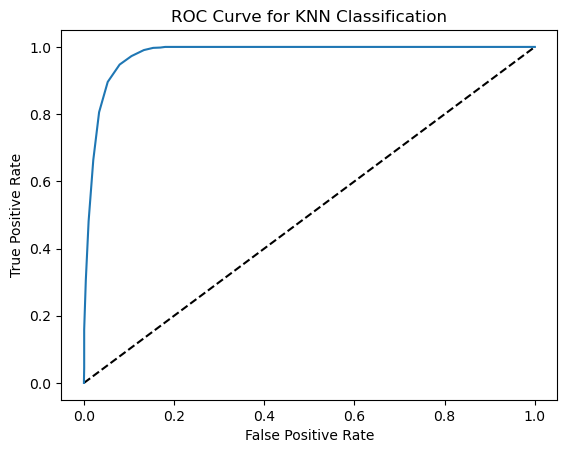

The Area Under the Curve (AUC) score is: 0.9784536030468888

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1934
           1       0.80      0.99      0.89      1066

    accuracy                           0.91      3000
   macro avg       0.90      0.93      0.91      3000
weighted avg       0.93      0.91      0.91      3000



In [17]:
# Generate AUC score and print
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))
